# Análisis de datos de un panel de miniMuTe 

### Arreglo de centelladores

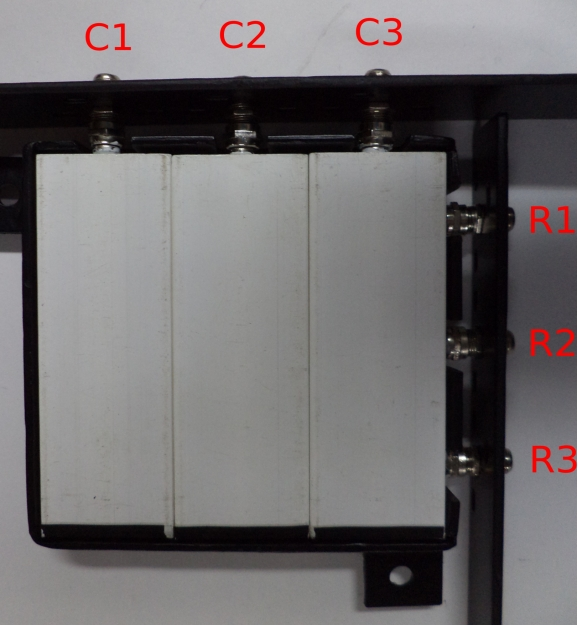

In [4]:
from IPython.display import Image
Image(filename='figures/Panel.jpg')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
data = np.loadtxt('data/miniMuTe/Pulses_Acep_P1_P2.dat')
N = len(data)
print ('Pulsos = ' + str(N))
nBars  = 3

Pulsos = 90395


### Conteo de eventos por píxel en el Panel 1

In [5]:
matrix_P1 = np.zeros((nBars,nBars))
matrix_P2 = np.zeros((nBars,nBars))

matrix_ang = np.zeros((5,5))

sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

evento = 0

for k in range (N):
    
    # Panel 1 (columns 1-17-25) (rows 33-41-57)
    
    columns_P1 = np.asarray([data[k][1], data[k][17], data[k][25]])
    rows_P1 = np.asarray([data[k][33], data[k][41], data[k][57]])
    
    # Panel 2 (columns 14-22-30) (rows 38-54-62)
    
    columns_P2 = np.asarray([data[k][14], data[k][22], data[k][30]])
    rows_P2 = np.asarray([data[k][38], data[k][54], data[k][62]])
    
    suma_P1_col = np.sum(columns_P1) 
    suma_P1_row =  np.sum(rows_P1)
    suma_P2_col =  np.sum(columns_P2)
    suma_P2_row =  np.sum(rows_P2)
    
    if (suma_P1_col == 1 and suma_P1_row == 1 and suma_P1_col == 1 and suma_P2_row == 1):   # Condición de activación de solo 4 barras
        for i in range(nBars):
            for j in range(nBars):
            
                matrix_P1[i,j]= rows_P1[i]*columns_P1[j]
                matrix_P2[i,j]= rows_P2[i]*columns_P2[j]


        
        
        if (np.sum(matrix_P1) == 1 and np.sum(matrix_P2) == 1):
    
            for i in range(nBars):
                for j in range(nBars):
            
                    if matrix_P1[i,j]== 1:
                        iP1 = i
                        jP1 = j
                    if matrix_P2[i,j]== 1:
                        iP2 = i
                        jP2 = j

            evento = evento + 1
                    
            h = iP1 - iP2
            b = jP1 - jP2
            #print 'Base = ' + str(b)
            #print 'Altura = ' + str(h)
            #print matrix_P1
            #print matrix_P2
            
            matrix_ang[h+2,b+2]= matrix_ang[h+2,b+2] + 1
            
print 'Número de eventos en ambos paneles = ' + str(evento)
print matrix_ang

Número de eventos en ambos paneles = 661
[[  6.   8.  14.  23.  11.]
 [ 16.  30.  29.  57.  26.]
 [ 13.  40.  46.  73.  25.]
 [ 14.  33.  40.  69.  33.]
 [  5.   7.  19.  21.   3.]]


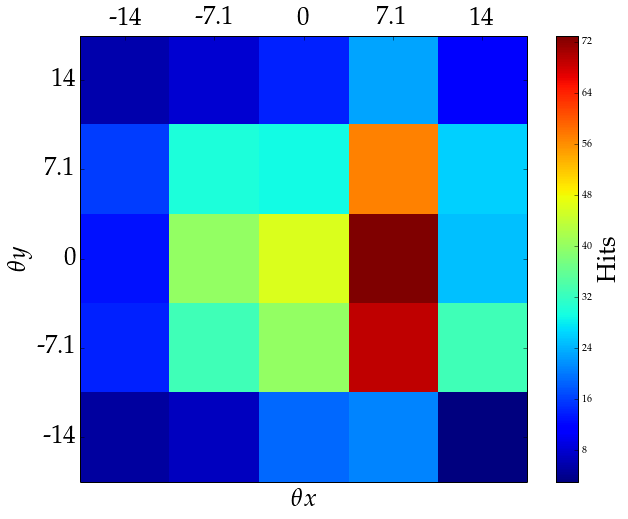

In [6]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel(r'\theta x', fontsize = 25)
ax.set_ylabel(r'\theta y', fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
im = plt.imshow(matrix_ang, interpolation='nearest', origin='low')

ax.invert_yaxis()
ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

# Set tick labels
labelsx = [ 0, -14, -7.1, 0, 7.1, 14]
labelsy = [ 0, 14, 7.1, 0, -7.1, -14]
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)